<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
real_estate = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
# выведем первые 10 строк таблицы с помощью метода head()
display(real_estate.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# с помощью метода info() изучим структуру таблицы: типы данных, колличество строк, столбцов, пропущенных данных.
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Данные успешно прочитаны из .csv файла и сохранены в переменной real_estate. Данные представляют собой 22 переменные и 23699 записей. Обнаружено достаточно много пропущенных данных в столбцах ceiling_height, is_apartment, balcony, parks_nearest, ponds_nearest и др. Далее рассмотрим каждый отдельный столбец данных для обработки пропущенных и недостоверных значений.

In [4]:
# пропущенные значения бары

def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

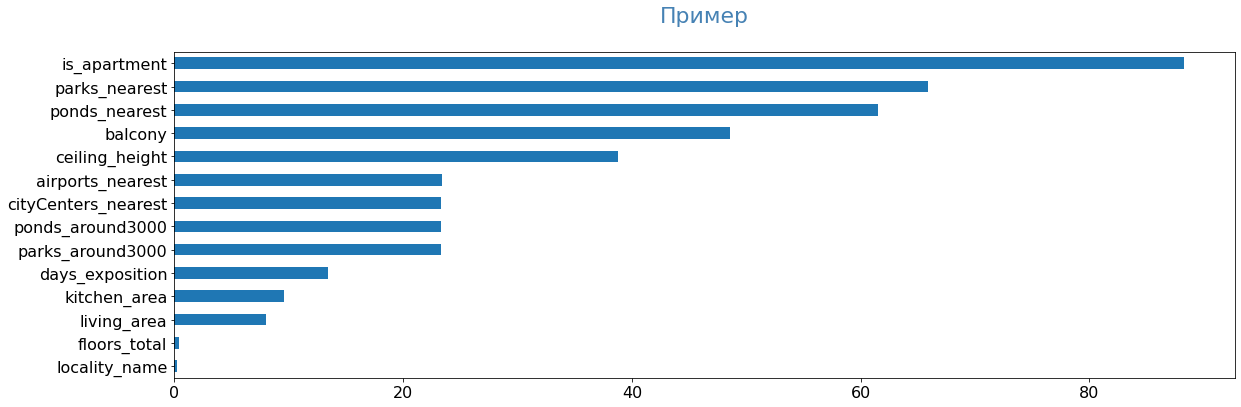

In [5]:
pass_value(real_estate)

## Предобработка данных

Рассмотрим данные в столбцах для выявления пропущенных и недостоверных данных.

Начнём с колличества комнат (столбец rooms).

In [6]:
# рассмотрим распределение колличества комнат в таблице методом value_counts()
display(real_estate['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Колличество комнат не может быть равно 0 (таких значений 197). Скорее всего эти данные не были заполнены, или 0 внесли по ошибке. Взглянем на общую площадь квартир таких объявлений. Построим гистаграмму распределения total_area при rooms = 0.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

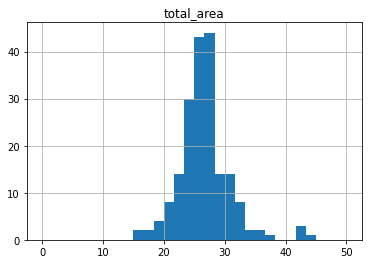

In [7]:
# методом loc[] выделим строки с 'rooms' == 0, построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 30 участков (параметр bins=30), ограничимся значением 'total_area' < 50 (м²)
real_estate.loc[real_estate['rooms'] == 0].hist('total_area', bins=30, range=(0, 50))

Квартиры с площадью меньше 40 м² скорее всего однокомнатные. Заменим значение rooms в таких объявлениях на 1.
В квартирах с большей площадью сложно судить о колличестве комнат. Оставим в таких записях нули и запомним, что колличество комнат в них неизвестно.

In [8]:
# В срезе данных где `rooms` = 0 и `total_area` < 40 запишем: `rooms` = 1.
real_estate.loc[(real_estate['rooms'] == 0) & (real_estate['total_area'] < 40), 'rooms'] = 1
# Выведем колличество оставшихся записей с нулевым значением `rooms`
print('Колличество объявлений с нулевым колличеством комнат:', len(real_estate.loc[(real_estate['rooms'] == 0)]))

Колличество объявлений с нулевым колличеством комнат: 9


Рассмотрим цену квартир в столбце last_price.
В данном столбце нет пропусков, но тип данных можно заменить на целый. Дробная часть не вносит искажение в данные, но целый тип данных занимает меньше места

In [9]:
real_estate['last_price'] = real_estate['last_price'].astype('int64')

Рассмотрим дату публикации в столбце first_day_exposition.
Данные представляют собой дату публикации объявления. Преобразуем тип данных из object в datetime с помощью метода to_datetime.

In [10]:
# формат даты передадим методу to_datetime с помощью параметра format.
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Рассмотрим высоту потолков в столбце ceiling_height

In [11]:
print('Колличество пропущенных значений в ceiling_height:', len(real_estate.loc[real_estate['ceiling_height'].isna()]))

Колличество пропущенных значений в ceiling_height: 9195


Пропущено много данных (почти 50%), удалить их нельзя. Возможно информация утеряна в результатее сбоя системы при загрузке/выгрузке базы данных.
Пропуски можно было бы заменить на значения из других объявлений в тех же домах, но информации об адресах квартир в нет.
Замена значений на средние или медианные может внести искажения в распределение данных. При возможности, необходимо восстановить данные по адресам домов или обратиться к владельцам данных.
На данном этапе оставим значения пустыми.

Рассмотрим общее колличество этажей в доме в столбце floors_total.

In [12]:
print('Колличество пропущенных значений в floors_total:', len(real_estate.loc[real_estate['floors_total'].isna()]))
display(real_estate.loc[real_estate['floors_total'].isna()].head(10))

Колличество пропущенных значений в floors_total: 86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Пропусков немного. Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).
Данные также могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.
Замена небольшого колличества пропусков средним или медианным значением не внесёт сильного искажения в распределение данных. Но такие замены могут внести искажения во влияние расположения квартир на их стоимость (последний этаж - стоимость). На данном этапе удалим строки с пропусками.

In [13]:
real_estate = real_estate.loc[~(real_estate['floors_total'].isna())]
print('Колличество оставшихся записей:', len(real_estate))

Колличество оставшихся записей: 23613


Также заметим, что тип данных floors_total вещественный float64. Однако колличество этажей - величина целая. Заменим тип данных на целочисленный int64.

In [14]:
real_estate['floors_total'] = real_estate['floors_total'].astype('int64')

Рассмотрим жилую площадь в столбце living_area

In [15]:
print('Колличество пропущенных значений в living_area:', len(real_estate.loc[real_estate['living_area'].isna()]))
display(real_estate.loc[real_estate['living_area'].isna()].head(10))

Колличество пропущенных значений в living_area: 1870


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.8,2018-02-19,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.8,2017-10-28,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.0,2018-11-18,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000,46.5,2017-03-06,1,NaN,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000,35.0,2018-01-01,1,NaN,12,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000,80.5,2018-01-15,3,NaN,25,NaN,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
116,18,10999000,97.2,2017-11-13,3,2.5,16,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0


Пропусков в данном столбце достаточно много (около 8% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. 

Рассмотрим принадлежность недвижимости к аппартаментам в столбце is_apartment

In [16]:
print('Колличество пропущенных значений в is_apartment:', len(real_estate.loc[real_estate['is_apartment'].isna()]))

Колличество пропущенных значений в is_apartment: 20838


В данном столбце очень много пропущенных данных. Возможно, данные не были заполнены изначально или были утеряны в результате сбоя системы при загрузке/выгрузке базы данных. В дальнейшем исследовании нам не понадобится информация в этом столбце. Пропуски можно оставить как есть.
Тип данных в столбце is_apartment object, хотя переменная принимает только значения True и False. На булев тип данных также указывает описание таблицы. Произведем преобразование типа данных из object в bool

In [17]:
real_estate['is_apartment'] = real_estate['is_apartment'].astype('bool')

Рассмотрим площадь кухни в столбце kitchen_area.

In [18]:
print('Колличество пропущенных значений в kitchen_area:', len(real_estate.loc[real_estate['kitchen_area'].isna()]))
display(real_estate.loc[real_estate['kitchen_area'].isna()].head(10))

Колличество пропущенных значений в kitchen_area: 2231


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000,32.8,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.8,2017-10-28,2,2.5,5,NaN,1,True,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.0,2018-11-18,1,NaN,22,NaN,3,True,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000,46.5,2017-03-06,1,NaN,13,NaN,13,True,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000,35.0,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,True,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000,80.5,2018-01-15,3,NaN,25,NaN,16,True,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000,31.0,2018-03-23,1,NaN,25,NaN,6,True,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000,27.0,2017-03-30,1,NaN,24,15.5,2,True,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [19]:
# находим редкое или аномальное значение в датасете

real_estate[(real_estate['kitchen_area'] + real_estate['living_area']) <=  real_estate['total_area']*0.99 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,True,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,NaN,5,17.5,4,True,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [20]:
real_estate.shape

(23613, 22)

In [22]:
# удаляем аномальные данные.

real_estate =  real_estate[ ( (real_estate['kitchen_area'] + real_estate['living_area']) <=  real_estate['total_area']*0.99) | (real_estate['kitchen_area'] < 99 ) | (real_estate['kitchen_area'].isna())]

# проверяем наличие редких значений

real_estate[(real_estate['kitchen_area'] + real_estate['living_area']) >=  real_estate['total_area']*0.99]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000,30.20,2018-02-14,1,2.65,9,26.10,5,True,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000,37.00,2018-07-09,1,2.50,25,28.00,6,True,...,9.00,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
545,9,4700000,23.80,2018-12-28,1,NaN,18,20.00,9,True,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000,31.59,2018-03-08,1,2.70,19,30.55,2,True,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000,53.70,2017-04-18,2,2.50,12,48.30,5,True,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22963,16,3150000,102.00,2018-06-26,5,NaN,9,78.00,8,True,...,24.00,1.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,57.0
23108,4,2950000,33.95,2019-02-12,1,NaN,19,21.68,11,True,...,12.00,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23202,13,4919880,67.92,2018-10-23,2,NaN,3,63.00,3,True,...,13.04,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23297,10,1850000,48.20,2019-03-13,2,NaN,5,42.20,2,True,...,6.00,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [ ]:
# проверим сколько записей удалили

real_estate.shape

Пропусков в данном столбце достаточно много (порядка 10% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Удалили аномальные суммы площадей.

Рассмотрим колличество балконов в столбце balcony

In [ ]:
display(real_estate.loc[real_estate['balcony'].isna()].head(10))

Пропусков в данном столбце достаточно много (около 50% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).
Пропуски скорее всего связаны с отсутствием балкона в квартире. Заменим пропуски на 0.
Также заменим тип данных в этом столбце с float64 на int64, так как колличество балконов - величина целая.

In [ ]:
# заменим пропущенные в столбце `balcony` данные на 0 с помощью метода `fillna`. 
# параметр inplace=True для замены данных в существующей таблице на месте.
real_estate['balcony'].fillna(0, inplace=True)

# заменим тип данных в столбце `balcony` методом astype()
real_estate['balcony'] = real_estate['balcony'].astype('int64')

Рассмотрим название населённого пункта в столбце locality_name

In [ ]:
print('Колличество пропущенных значений в locality_name:', len(real_estate.loc[real_estate['locality_name'].isna()]))
display(real_estate.loc[real_estate['locality_name'].isna()].head(10))

Пропусков в данном столбце немного (48 записей). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены, удаленность от аэропортов и тд).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.
Данные невозможно восстановить на основе имеющейся информации. Заменим пропуски на значение Неизвестно

In [ ]:
real_estate['locality_name'].fillna('Неизвестно', inplace=True)

Рассмотрим расстояние до ближайшего аэропорта в столбце airports_nearest

In [ ]:
print('Колличество пропущенных значений в airports_nearest:', len(real_estate.loc[real_estate['airports_nearest'].isna()]))
display(real_estate.loc[real_estate['airports_nearest'].isna()].head(10))

Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.

In [ ]:
(real_estate[real_estate['airports_nearest'].isnull()]
     .value_counts('locality_name')).head(15).to_frame().rename(columns = {0:'count'})

Рассмотрим расстояние до центра в столбце cityCenters_nearest

In [ ]:
print('Колличество пропущенных значений в cityCenters_nearest:', len(real_estate.loc[real_estate['cityCenters_nearest'].isna()]))
display(real_estate.loc[real_estate['cityCenters_nearest'].isna()].head(10))

In [ ]:
print('Колличество пропущенных значений в cityCenters_nearest:', len(real_estate.loc[real_estate['cityCenters_nearest'].isna()]))
display(real_estate.loc[real_estate['cityCenters_nearest'].isna()].head(10))

Посотрим колличество пропусков в расстоянии до центра города.

In [ ]:
(real_estate[real_estate['cityCenters_nearest'].isnull()]
     .value_counts('locality_name')).head(15).to_frame().rename(columns = {0:'count'})

Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. 

Рассмотрим число парков в радиусе 3 км в столбце parks_around3000

In [ ]:
print('Колличество пропущенных значений в parks_around3000:', len(real_estate.loc[real_estate['parks_around3000'].isna()]))
display(real_estate.loc[real_estate['parks_around3000'].isna()].head(10))

Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.
На данном этапе оставим пропуски как есть, так как их слишком много.

Рассмотрим расстояние до ближайшего парка в столбце parks_nearest

In [ ]:
print('Колличество пропущенных значений в parks_nearest:', len(real_estate.loc[real_estate['parks_nearest'].isna()]))
display(real_estate.loc[real_estate['parks_nearest'].isna()].head(10))

Пропусков в данном столбце достаточно много (порядка 65% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.

Рассмотрим число водоёмов в радиусе 3 км в столбце ponds_around3000

In [ ]:
print('Колличество пропущенных значений в ponds_around3000:', len(real_estate.loc[real_estate['ponds_around3000'].isna()]))
display(real_estate.loc[real_estate['ponds_around3000'].isna()].head(10))

Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.
На данном этапе предположим, что пропуски остались по причине отсутствия водоёмов в радиусе 3 км и заменим их на 0.
На данном этапе оставим пропуски как есть, так как их слишком много.

Рассмотрим расстояние до ближайшего водоёма в столбце ponds_nearest.

In [ ]:
print('Колличество пропущенных значений в parks_nearest:', len(real_estate.loc[real_estate['parks_nearest'].isna()]))
display(real_estate.loc[real_estate['parks_nearest'].isna()].head(10))

Пропусков в данном столбце достаточно много (около 60% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.

Рассмотрим колличество дней, которое объявление было размещено. Столбец days_exposition

In [ ]:
print('Колличество пропущенных значений в days_exposition:', len(real_estate.loc[real_estate['days_exposition'].isna()]))
display(real_estate.loc[real_estate['days_exposition'].isna()].head(10))

Пропусков в данном столбце достаточно много (порядка 13% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд.).
Данные могли быть утеряны в результате сбоя системы при выгрузке базы.
Также возможно информация не была внесена системой, так как объявление не было снято в момент выгрузки данных.
Информацию можно восстановить при обращении к владельцам данных.
На данном этапе предположим, что объявления с пропусками не были сняты и оставим их как есть.

Отобразим конечный результат после предобработки.

In [ ]:
real_estate.info()

Выводы:

Данные в таблице содержат больщое колличество пропусков (до 65% в столбце).
Пропуски были проанализированы и по возможности заполнены (например пропущенные значения в колличестве балконов заменены на 0).
Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.
Дополнительно был проанализирован столбец rooms. Нулевые значения были заменены на 1 (1-комнатная квартира) при общей площади квартиры total_area < 40 м²
Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.

In [ ]:
real_estate.info()

## Расчёты и добавление результатов в таблицу

1) Посчитаем цену квадратного метра квартиры.
Для этого разделим цену квартиры last_price на общую площадь квартиры total_area. Округлим полученное значение до одного знака после запятой. Результат запишем в столбец meter_price

In [ ]:
# округление произведём с помощью метода round()
real_estate['meter_price'] = round(real_estate['last_price'] / real_estate['total_area'], 1)

2) Посчитаем день недели, месяц и год публикации объявления.
Для этого воспользуемся методом .dt.weekday, .dt.month и .dt.year соответственно.
Дату публикации возьмём из столбца first_day_exposition.
Полученные данные сохраним в столбцах publish_weekday, publish_month, publish_year

In [ ]:
real_estate['publish_weekday'] = real_estate['first_day_exposition'].dt.weekday
real_estate['publish_month'] = real_estate['first_day_exposition'].dt.month
real_estate['publish_year'] = real_estate['first_day_exposition'].dt.year

3) Создадим категорию для этажа квартиры.
Данные возьмём из столбцов floor для этажа квартиры и floors_total колличества этажей в доме.
Результат сохраним в столбце floor_cat.
Для определения категории создадим функцию floor_category(). На вход функции поступает строка с данными, внутри сравнивается этаж квартиры с колличеством этажей в доме, и на выход поступает название категории. Далее с помощью метода apply применяем созданную функцию ко всем строкам таблицы.

In [ ]:
#  создадим функцию `floor_category(row)` для нахождения категории этажа квартиры
def floor_category(row):
    """
    input: row - строка, содержит информацию о квартире
    output: (object) - категория этажа квартиры
    Функция принимает на вход строку с данными, 
    сравнивает этаж квартиры `floor` с колличеством этажей в доме `floors_total`
    и возвращает категорию:
    
    Категория:          Описание:
    первый              первый этаж в доме
    последний           последний этаж в доме
    другой              все остальные этажи
    """
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# с помощью метода apply применяем функцию floor_category ко всем строкам таблицы 'real_estate'
real_estate['floor_cat'] = real_estate.apply(floor_category, axis=1)

4) Определим соотношение жилой и общей площади квартиры, а также отношение площади кухни к общей.
Данные возьмём из столбцов living_area, total_area и kitchen_area.
Результаты вычислений сохраним в столбцах living_to_total и kitchen_to_total соответственно.
Результаты округлим до 2 знаков после запятой.

In [ ]:
real_estate['living_to_total'] = round(real_estate['living_area'] / real_estate['total_area'], 2)
real_estate['kitchen_to_total'] = round(real_estate['kitchen_area'] / real_estate['total_area'], 2)

In [ ]:
# Конечный вид таблицы:
display(real_estate.head(10))

Выводы:

Метрики были успешно посчитаны, исходя из условия задания, и добавлены в основную таблицу.
Названия для новых столбцов выбраны, исходя из информации, которая в них хранится.
В новых столбцах есть пропущенные значения в тех записях, где были пропуски исходных данных.

## Исследовательский анализ данных

4.1 Изучение параметров: площадь, цена, число комнат, высота потолков

1) Рассмотрим площадь квартир в столбце total_area. Построим гистограмму для данного параметра.

In [ ]:
# выведем информацию о распределении значений в параметре total_area методом describe()
display(real_estate['total_area'].describe())
# найдём .99-й квантиль значений total_area с помощью метода .quantile(.99)
print('99-й персентиль значений total_area:', round(real_estate['total_area'].quantile(0.99), 1))
# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 20 участков (параметр bins=20), ограничимся значением 'total_area' < 200 (м²)
real_estate.hist('total_area', bins=20, range = (0, 200))
plt.show()

Минимальная площадь 12 м², вполне правдоподобное значение, возможно продаётся комната.
Максимальное значение - 900 м². Достаточно высокое, но также правдоподобно.
99% значений укладывается в отрезке 12 - 200 м². Остальные случаи можно считать выбросами.
Медианное значение (52.0) меньше среднего (60.3), следовательно, данные немного смещены влево. Это нормально: колличество небольших квартир больше, но очень большие по площади вносят вклад в смещение данных.

2) Рассмотрим цену квартир в столбце last_price. Построим гистограмму для данного параметра.

In [ ]:
# выведем информацию о распределении значений в параметре last_price методом describe()
display(real_estate['last_price'].describe())
# найдём 99-й персентиль значений last_price с помощью метода .quantile(.99)
print('99-й персентиль значений last_price:', round(real_estate['last_price'].quantile(0.99), 1))
# построим гистаграмму распределения 'last_price' методом hist().
# разделим гистограмму на 30 участков (параметр bins=30), ограничим значения 'last_price' < 3.6*10**7 (.99-й квантиль)
real_estate.hist('last_price', bins=30, range = (0, 3.6*10**7))
plt.show()

Минимальная площадь 12190, достаточно маленькое, но возможное значение.
Максимальное значение - 7.6*10^8. Достаточно высокое, но также правдоподобно.
99% значений меньше 3.6*10^7. Остальные случаи можно считать выбросами.
Медианное значение 4.7*10^6 меньше среднего 6.5*10^6, следовательно, данные смещены влево. Это нормально: колличество дешёвых квартир больше, но очень дорогая недвижимость вносит вклад в смещение данных.

3) Рассмотрим число комнат в столбце rooms. Построим гистограмму для данного параметра.

In [ ]:
# выведем информацию о распределении значений в параметре rooms методом describe()
display(real_estate['rooms'].describe())
# найдём 99-й персентиль значений rooms с помощью метода .quantile(.99)
print('99-й персентиль значений rooms:', round(real_estate['rooms'].quantile(0.99), 1))
# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 20 участков (параметр bins=20)
real_estate.hist('rooms', bins=40) # больше корзин больше возиожностей для наглядности
plt.show()

Аномальные нулевые значения были преобразованы в разделе 2. Осталось 9 нулевых значений, они не внесут большого отклонения распределение, можно считать их выбросами.
Максимальное значение - 19. Достаточно высокое, но правдоподобно.
99% значений меньше 6. Остальные случаи можно считать выбросами.
Медианное и среднее значения равны 2, данные практически не смещены, так как абсолютное большинство квартир имеют 1, 2, 3 и 4 комнаты. Разброс значений очень мал.

4) Рассмотрим высоту потолков в столбце ceiling_height. Построим гистограмму для данного параметра.

In [ ]:
# выведем информацию о распределении значений в параметре ceiling_height методом describe()
display(real_estate['ceiling_height'].describe())
# найдём 99.5-й персентиль значений ceiling_height с помощью метода .quantile(.995)
print('99.5-й персентиль значений ceiling_height:', round(real_estate['ceiling_height'].quantile(0.995), 1))
# найдём 0.5-й персентиль значений ceiling_height с помощью метода .quantile(.05)
print('0.5-й персентиль значений ceiling_height:', round(real_estate['ceiling_height'].quantile(0.005), 1))
# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 18 участков (параметр bins=18), 
# ограничим значения 'ceiling_height' (2.4, 4.2), отбросим 1% аномально высоких и низких значений
real_estate.hist('ceiling_height', bins=18, range = (2.4, 4.2))
plt.show()

Есть небольшое аномальное поведение значении 3 м. Это может быть объяснено особенностью заполнения данных (округляли высоту до 3 м, когда реальная высота 2.9 или 3.1 м).
Максимальное значение - 100 м, ошибочное, но таких значений мало: 99% значений меньше 4 м. Остальные случаи можно считать выбросами, они не внесут отклонение в распределение.
Минимальное значение - 1 м, скорее всего ошибочное, но таких значений мало: 99% значений больше 2.5 м. Остальные случаи можно считать выбросами, они не внесут большое отклонение в распределение.
Медианное и среднее значения равны 2.65 и 2.77 соответственно. Данные практически не смещены, так как абсолютное большинство квартир имеют высоту потолков 2.5 - 3.5 м. Разброс значений небольшой. Отсюда могут быть и небольшие аномалии в распределении Пуассона.

In [ ]:
# построим график значений для столбца с высотой потолков
(
    real_estate['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(1.5,4.5), grid=True, title='Высота потолков', figsize=(18,4))        
)
plt.show()
(
    real_estate['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(1.5,4.5), grid=True, title='Высота потолков', figsize=(18,4))
        .set(ylim = (0, 200))
)
plt.show()

4.2 Изучение времени продажи квартиры

Время продажи квартиры находится в параметре days_exposition.
Для начала определим 1-й и 99-й персентили распределения, чтобы не включать редкие значения в гистограмму.

In [ ]:
# найдём 99-й персентиль значений rooms с помощью метода .quantile(.99)
print('99-й персентиль значений days_exposition:', round(real_estate['days_exposition'].quantile(0.99), 1))
# найдём 1-й персентиль значений rooms с помощью метода .quantile(.01)
print('1-й персентиль значений days_exposition:', round(real_estate['days_exposition'].quantile(0.01), 1))

In [ ]:
# построим гистаграмму распределения 'days_exposition' методом hist().
# разделим гистограмму на 40 участков (параметр bins=40),
# ограничим гистограмму значениями 0 - 1067
real_estate.hist('days_exposition', bins=40, range=(0,1067))
plt.show()

Теперь рассчитаем среднее, медианное значения, а также посмотрим на распределение значений с помощью метода describe()

In [ ]:
print('Среднее значение времени продажи:', round(real_estate['days_exposition'].mean(),0))
print('Медианное значение времени продажи:', round(real_estate['days_exposition'].median(),0))
real_estate['days_exposition'].describe()

Среднее значение в 2 раза больше медианного. Данные сильно смещены влево.
Это означает, что большинство квартир проданы за сравнительно небольшой срок (45 - 232 дней), но есть очень долгие объявления, вносящие смещение в данные.
1% объявлений были сняты за 4 и меньше дней. Можно считать, что это необычно короткий срок.

Теперь определим, какие сроки можно считать очень долгими. Для начала построим ящик с усами boxplot().

In [ ]:
real_estate.boxplot('days_exposition');

Можно оценить, что верхняя граница, после которой данные можно считать выбросами, находится в районе 500 дней. Но выбросы очень большие (до 1600 дней), поэтому график не очень информативен. Рассчитаем верхнюю границу вручную.
75%Q + 1.5 * МКР = 232 + 1.5*(232 - 45) = 512
Время продажи квартиры больше 512 дней можно считать необычно долгим.

4.3 Поиск редких и выбивающихся значений

Ранее было рассмотрено колличество комнат (столбец rooms). Нулевые значения при общей площади < 40 м² были заменены на 1. Осталось 9 нулевых значений. Их можно удалить без ущерба для распределения выборки.

In [ ]:
real_estate = real_estate.loc[real_estate['rooms'] != 0]

In [ ]:
real_estate.shape

Рассмотрим высоту потолков (столбец ceiling_height). Значения < 2.5 м и > 4.1 м скорее всего ошибочны. Таких даннных мало (около 1%). Следовательно, их можно удалить без ущерба распределению.

In [ ]:
real_estate = real_estate.loc[(real_estate['ceiling_height'].isna()) | ((real_estate['ceiling_height'] >= 2.5) \
                              & (real_estate['ceiling_height'] <= 4.1))]

In [ ]:
real_estate.shape

Уберём квартиры с 19 комнатами.


In [ ]:
real_estate = real_estate.loc[real_estate['rooms'] != 19]

Уберём редкие значения в столбце общей цены и за кв. метр (миним.)

In [ ]:
real_estate = real_estate.loc[real_estate['meter_price'] != 111.8]
real_estate = real_estate.loc[real_estate['last_price'] != 763000000]

Обновим индексы в таблице после удаления строк методом reset_index()

In [ ]:
real_estate = real_estate.reset_index(drop=True)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

4.4 Поиск факторов влияющих на стоимость квартиры

Рассмотрим влияние на стоимость last_price: площади квартиры total_area, числа комнат rooms, удалённости от центра cityCenters_nearest, этажа квартиры floor_cat, даты размещения: дня недели, месяца и года (параметры publish_weekday, publish_month и publish_year соответственно).
Построим графики зависимостей данных параметров (scatterplot), с помощью метода plot()
Стоимость квартиры ограничим значением 3.6 * 10^7 (99% всех значений). Остальные значения будем считать выбросами.
Также определим коэффициент корреляции Пирсона для каждой пары параметров.

Создадим вспомогательную функцию для построения графиков scatterplot.

In [ ]:
def last_price_scatter(column, xrange, need_median=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
    output: None
    Функция строит scatteplot зависимости цены за квартиру 'last_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'last_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    """
    ax = real_estate.plot(x = column,
                          y = 'last_price',
                          kind = 'scatter',         # тип графика
                          style = 'o',              # отображение данных точками
                          alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                          figsize = (8, 4),         # размер графика
                          xlim = xrange,            # пределы по оси x
                          ylim = (0, 3.6*10**7),    # пределы по оси y
                          grid = True               # отобразить сетку
                         )
    if need_median:
        # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
        (real_estate
         .groupby(column)['last_price']
         .agg(['median'])
         # отобразим медианы стоимости квартир для разных групп
         .plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,          # отобразить подпись графика
               label = 'median',    # название кривой
               grid = True              # отобразить сетку
              )
        )      
        
    plt.show()

1) Зависимость last_price от total_area.
Ограничим площадь квартиры значением 198 (99% всех значений), чтобы отбросить редкие выбросы для наглядности.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('total_area', xrange=(0, 198))

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и total_area:', \
      round(real_estate['last_price'].corr(real_estate['total_area']), 3))

По графику видно, что в среднем стоимость квартиры растёт с увеличением общей площади.
Коэффициент корреляции Пирсона 0.646 также подтверждает положительную зависимость. Значение коэффициента не очень высокое, зависимость между параметрами достаточно слабая.

2) Зависимость last_price от rooms.
Ограничим колличество комнат значением 7 (99% всех значений), чтобы отбросить редкие выбросы для наглядности.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('rooms', xrange=(0.5, 7.2), need_median=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms:', \
      round(real_estate['last_price'].corr(real_estate['rooms']), 3))

По графику видно, что в среднем стоимость квартиры растёт с увеличением колличества комнат.
Коэффициент корреляции Пирсона 0.361 также подтверждает положительную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.

3) Зависимость last_price от cityCenters_nearest

Ограничим колличество комнат значением 0.50067 (99% персентиль), чтобы отбросить редкие выбросы для наглядности.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('cityCenters_nearest', xrange=(0, 50067))

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest:', \
      round(real_estate['last_price'].corr(real_estate['cityCenters_nearest']), 3))

По графику видно, что в среднем стоимость квартиры падает с увеличением расстояния до центра.
Коэффициент корреляции Пирсона -0.205 также подтверждает отрицательную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.

4) Зависимость last_price от floor_cat.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('floor_cat', xrange=(-0.1, 2.1), need_median=True)

По графику видно, что в среднем стоимость квартиры практически не зависит от этажа. На первом этаже стоимость квартир немного ниже, но разница незначительна.

5) Зависимость last_price от publish_weekday.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_weekday', xrange=(-0.1, 6.1), need_median=True)

По графику видно, что в среднем стоимость квартиры никак не зависит от дня недели размещения объявления.

6) Зависимость last_price от publish_month.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_month', xrange=(0.8, 12.2), need_median=True)

По графику видно, что в среднем стоимость квартиры никак не зависит от месяца размещения объявления.

7) Зависимость last_price от publish_year.

In [ ]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_year', xrange=(2013.8, 2019.2), need_median=True)

На графике видно, что с 2014 по 2016 год наблюдалось снижение стоимости квартир. С 2017 по 2019 год наблюдается незначительное повышение стоимости.

4.5 Исследование стоимости квадратного метра в различных районах

Сгруппируем объявления по названию населённого пункта, посчитаем колличество записей в каждой группе, а также медианное значение стоимости квадратного метра. После этого отсортируем результат по убыванию колличества записей и выберем первые 10 групп. Результат запишем в переменную localities.

In [ ]:
localities = (real_estate
              .groupby('locality_name')['meter_price']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(10)
             )
display(localities)

Посчитаем 99-й персентиль стоимости квадратного метра. Далее будем использовать полученное значение как верхнюю границу графика (отбросим 1% редких значений, чтобы сделать график нагляднее).

In [ ]:
print('99-й персентиль значений meter_price:', round(real_estate['meter_price'].quantile(0.99), 1))

In [ ]:
# построим график scatterplot зависимости meter_price от locality_name
ax = (real_estate
 .query('locality_name in @localities.index')   # срез данных из основной таблицы, 
                                                # где locality_name совпадает с индексами из таблицы localities
 .plot(x = 'locality_name',
       y = 'meter_price',
       kind = 'scatter',         # тип графика
       style = 'o',              # отображение данных точками
       alpha = 0.3,              # прозрачность (для визуализации плотности данных)
       figsize = (8, 4),         # размер графика
       ylim = (0, 2.7*10**5),    # пределы по оси y
       )
     )

# сохраним в переменной `locals_list` список районов в таком же порядке, как на графике
locals_list = real_estate.query('locality_name in @localities.index')['locality_name'].unique()
# изменим порядок индексов в localities для корректного отображения медиан на графике.
localities = localities.reindex(locals_list)
# отобразим медианы стоимости квадратного метра на графике с данными
localities.plot(ax=ax,           # копируем оси с предыдущего графика
                y = 'mean',    # медианы стоимости квадратного метра по оси y
                style = '-or',   # стиль кривой - красная линия с точками в местах расчётов
                grid = True      # отобразить сетку на графике
               )

# повернём названия районов на 45 градусов против часовой стрелки
plt.xticks(rotation=45, ha='right')
plt.show()

Самая высокая средняя стоимость жилья в Санкт-Петербурге: 114694.6 за квадратный метр
Самая низкая средняя стоимость жилья в Выборге: 58190.1 за квадратный метр

4.6 Определение границы центрального района в Санкт-Петербурге

Задача — выяснить, какая область входит в центр.
Выделим квартиры в Санкт-Петербурге (locality_name) методом loc и сохраним их в переменной real_estate_peter.
Создадим столбец dist_center с расстоянием до центра в километрах, округлим до целых значений.
Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра.
Определим границу, где график сильно меняется — это и будет центральная зона.

In [ ]:
# методом query получим срез данных, результат запишем в таблицу real_estate_peter
# сбросим индексы методом reset_index(drop=True)
real_estate_peter = (real_estate
                     .query('locality_name == "Санкт-Петербург"')
                     .reset_index(drop=True)
                    )

# в dist_center запишем расстояние до центра в километрах, округлим значение методом round()
real_estate_peter['dist_center'] = round(real_estate_peter['cityCenters_nearest'] / 1000, 0)

Создадим вспомогательную функцию для отображения графиков scatterplot для квартир в центре Санкт-Петербурга

In [ ]:
def peter_last_price_scatter(column, xrange, need_median=False, center_data=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
           center_data (bool) - флаг для построения данных для квартир в централлььном районе
    output: None
    Функция строит scatteplot зависимости цены за квадратный метр 'meter_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'meter_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    При center_data=True, функия сторит такие же графики в тех же осях для квартир в центре города
    Данные берутся из таблицы для квартир Санкт-Петербурга `real_estate_peter` 
    Данные для центра Санкт-Петербурга берутся из таблицы `real_estate_center`
    """
    # построим график scatter зависимости цены за квадратный метр от расстояния до центра
    ax = real_estate_peter.plot(x = column,
                    y = 'last_price',
                    kind = 'scatter',         # тип графика
                    style = 'o',              # отображение данных точками
                    alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                    figsize = (8, 4),         # размер графика
                    ylim = (0, 3.6*10**7),    # пределы по оси y
                    xlim = xrange,
                    grid = True
                    )
    if need_median:
        # сгруппируем данные по расстоянию до центра, посчитаем медианное значение цены за квадратный метр
        (real_estate_peter
         .groupby(column)['last_price']
         .agg(['median'])
         # на тех же осях отобразим кривую изменения медианного значения цены за квадратный метр от расстояния до центра.
         .plot(ax=ax,                   # копируем оси с предыдущего графика
               y = 'median',            # медианы стоимости квадратного метра по оси y
               style = '-or',           # стиль кривой - красная линия с точками в местах расчётов
               legend = True,              # отобразить подпись графика
               label = 'median peter',    # название кривой               
               grid = True              # отобразить сетку на графике
              )
        )
    
    # при необходимости построить данные из другой таблицы на тех же осях
    if center_data:
        real_estate_center.plot(ax=ax,
                              x = column,
                              y = 'last_price',
                              kind = 'scatter',         # тип графика
                              style = 'o',              # отображение данных точками
                              color = 'green',
                              alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                              figsize = (8, 4),         # размер графика
                              xlim = xrange,            # пределы по оси x
                              ylim = (0, 3.6*10**7),    # пределы по оси y
                              grid = True               # отобразить сетку
                              )
        if need_median:
            # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
            (real_estate_center
             .groupby(column)['last_price']
             .agg(['median'])
             # отобразим медианы стоимости квартир для разных групп
             .plot(ax = ax,
                   y = 'median',
                   style = '-oy',
                   legend = True,              # отобразить подпись графика
                   label = 'median center',    # название кривой
                   grid = True                 # отобразить сетку
                  )
            )
        
    plt.show()

In [ ]:
peter_last_price_scatter('dist_center', xrange=(-1,30), need_median=True)

Цена квартиры начинает быстро расти при расстоянии до центра <= 3 км. Будем считать границу центрадьного района за 3км

4.7 Исследование квартир в центральном районе Санкт-Петербурга

1) Сохраним в таблице real_estate_center объявления о квартирах в центре Санкт-петербурга

In [ ]:
# Сделаем срез данных из таблицы `real_estate_peter`, где расстояние до центра до 3 метров.
# результат запишем в таблицу `real_estate_center`
real_estate_center = (real_estate_peter
                      .query('dist_center <= 3')
                      .reset_index(drop=True)
                     )

2) Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Создадим вспомогательную функцию для построения двух гистограмм (для всех объявлений и квартир в центре Санкт-Петербурга) в одной системе координат для наглядного сравнения различных параметров.

In [ ]:
def show_histograms(column, bins, lims):
    """
    input: column (str) - название столбца для построения гистограммы
           bins (int)   - колличество ячеек для гистограмм
           lims (tuple) - пределы значений в столбце column для построения гистограмм
    output: None
    Функция строит две гистограммы из таблиц real_estate и real_estate_center для столбца column
    в одной системе координат. Гистограммы отображают плотности распределения значений для наглядности.
    """
    ax = real_estate_peter.plot(kind = 'hist',
                          y = column,
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = bins,
                          range = lims,
                          alpha = 0.5,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = column + ' all'  # строка подписи для графиков
                         )
    real_estate_center.plot(kind = 'hist',
                            y = column,
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = bins,
                            range = lims,
                            alpha = 0.5,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = column + ' center'
                           )
    # density=True - необходимо для отображения двух гистограмм в одной системе координат.
    plt.show()

In [ ]:
# методом describe посмотрим на численное распределение площади 'total_area' для квартир в центре Санкт-Петербурга
display(real_estate_center['total_area'].describe())

# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 25 участков, ограничимся значением 'total_area' < 300 (м²) (99% всех данных)
show_histograms('total_area', bins=25, lims=(0, 300))

Среднее и медианное значения total_area для квартир в центре равны соответственно 98.7 и 85.0.
Среднее и медианное значения total_area для всех квартир в городе более низкие и равны соответственно 64.5 и 55.0.
На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

In [ ]:
# посмотрим на численное распределение цены за квадратный метр 'meter_price' для квартир в центре Санкт-Петербурга
display(real_estate_center['meter_price'].describe())

# построим гистаграмму распределения 'meter_price' методом hist().
# разделим гистограмму на 25 участков, ограничимся значением 'meter_price' (0, 2.7*10**5) (99% всех данных)
show_histograms('meter_price', bins=25, lims=(0, 2.7*10**5))


Среднее и медианное значения meter_price для квартир в центре равны соответственно 1.25 и 1.17 (*10^5).
Среднее и медианное значения meter_price для всех квартир более низкие и равны соответственно 1.15 и 1.05 (*10^5).
На гистограммах также видно небольшое смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

In [ ]:
# посмотрим на численное распределение колличества комнат 'rooms' для квартир в центре Санкт-Петербурга
display(real_estate_center['rooms'].describe())

# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 10 участков, ограничимся значением 'rooms' (0, 10) (99% всех данных)
show_histograms('rooms', bins=10, lims=(0, 10))

Среднее и медианное значения rooms для квартир в центре равны 3.
Среднее и медианное значения rooms для всех квартир более низкие и равны 2.
На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

In [ ]:
# посмотрим на численное распределение высоты потолков 'ceiling_height' для квартир в центре Санкт-Петербурга
display(real_estate_center['ceiling_height'].describe())

# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 9 участков, ограничимся значением 'ceiling_height' (2.4, 4.2) (99% всех данных)
show_histograms('ceiling_height', bins=9, lims=(2.4, 4.2))

Среднее и медианное значения ceiling_height для квартир в центре равны соответственно 3.19 и 3.2.
Среднее и медианное значения ceiling_height для всех квартир более низкие и равны соответственно 2.76 и 2.7.
На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

3) Выделим факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Рассмотрим зависимость цены квартиры last_price от колличества комнат rooms для всех объявлений и для квартир в центре.

In [ ]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('rooms', xrange=(0, 7.2), need_median=True, center_data=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms по всему городу:', \
      round(real_estate_peter['last_price'].corr(real_estate_peter['rooms']), 3))
print('Коэффициент корреляции Пирсона между last_price и rooms в центре города:', \
      round(real_estate_center['last_price'].corr(real_estate_center['rooms']), 3))

На рафике видно, что при небольшом колличестве комнат, медианное значение last_price немного выше для квартир в центре. При росте числа комнат (6 и выше) разница в цене практически отсутствует. Возможно, данных недостаточно для более точной оценки и информация для большого числа комнат недостоверна.
Коэффициент корреляции Пирсона для квартир в центре 0.237, меньше, чем для всего города (0.369). Это может быть обусловлено общей повышенной стоимостью квартир в центре города.

Рассмотрим зависимость цены квартиры last_price от этажа floor_cat для всех объявлений и для квартир в центре.

In [ ]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('floor_cat', xrange=(-0.1, 2.2), need_median=True, center_data=True)

На рафике видно, что медианное значение last_price немного выше для квартир в центре для всех вариантов floor_cat. Это обусловлено общей повышенной стоимостью квартир в центральном районе.

Рассмотрим зависимость цены квартиры last_price от удалённости от центра cityCenters_nearest для всех объявлений и для квартир в центре.

In [ ]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('cityCenters_nearest', xrange=(0, 3000), center_data=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для квартир в центре:', \
      round(real_estate_peter['last_price'].corr(real_estate_peter['cityCenters_nearest']), 3))
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для всех квартир:', \
      round(real_estate_center['last_price'].corr(real_estate_center['cityCenters_nearest']), 3))

Коэффициент корреляции Пирсона для квартир в центре -0.163, немного меньше по абсолютному значению, чем для квартир по всему городу (-0.257). Зависимость между удалённостью от центра ценой за квартиру немного выше у квартир по всему городу. Но для квартир в центре данных не очень много, информация может быть недостоверной.

Рассмотрим зависимость цены квартиры last_price от года publish_year для всех объявлений и для квартир в центре.

In [ ]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('publish_year', xrange=(2013.8, 2019.2), need_median=True, center_data=True)

На рафике видно, что медианное значение last_price почти в 2 раза выше для квартир в центре для объявлений после 2015 года publish_year. Это обусловлено общей повышенной стоимостью квартир в центральном районе.
С 2014 по 2015 год для квартир в центральном районе наблюдается более резкий спад в цене, чем для объявлений по всему городу.

Выводы:

Изучены параметры квартир: площадь, цена, число комнат, высота потолков. Распределения данных близки к распределению Пуассона
Аномальные данные (нулевые значения колличества комнат и тд) выявлены, по возможности исправлены, небольшие неправдоподобные выбросы удалены.
Изучено время продажи квартир. Распределение близко к Распределению Пуассона. Аномальных пиков в гистограмме не выявлено. Данные сильно смещены влево (среднее значение в 2 раза больше медианного). Бльшинство квартир продаётся за 45-232 дней. Время продажи меньше 4 дней и больше 512 дней можно считать необычными выбросами.
Проанализированы факторы, влияющие на стоимость квартиры. Наибольшую корреляцию показали: общая площадь total_area, колличество комнат rooms, удалённость от центра города cityCenters_nearest. Также выявлена зависимость цены от года размещения объявления publish_year. Это может быть обусловлено колебаниями рынка недвижимости.
Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (114694.6), самая дешёвая стоимость квадратного метра в Выборге (58190.1).
Проанализирована зависимость цены за квадратный метр от расстояния до центра города в Санкт-Петербурге. Граница центрального района около 3 км.
Рассмотрены факторы, влияющие на стоимость квартиры в Санкт-Петербурге и его центре. Отмечена общая повышенная стоимость квартир в центральном районе. В остальном корреляции не сильно отличаются. Замечен резкий спад в цене за квартиру в центральном районе в период с 2014-2015 гг (примерно в 3.5 раза).

## Общий вывод

1) Данные в таблице real_estate_data.csv о продаже квартир содержат много пропущенной информации (от 5 до 65 % пропусков в различных столбцах). Часть информации могла быть утеряна в результате сбоев системы при загрузке/выгрузке данных. Часть информации могла отсутствовать изначально (объявления не были заполнены на 100%). Информация была восстановлена по существующим данным из других параметров, или оставлениа как есть.

2) Аномальные/неправдоподобные данные были частично исправлены, исходя из данных таблицы. Небольшие выбросы (до 1%), не влияющие на общее распределение данных, были удалены. Также типы данных были исправлены, логики хранящейся информации.

3) Дополнитеьные параметры (цена квадратного метра, год публикации, категории этажа квартиры и тд) были рассчитаны добавлены в исходную таблицу для дальнейших исследований.

4) Аномальных пиков после преобразования данных не замечено.

5) Время продажи квартир имеет достаточно большой разброс: 45-232 дней. Выбросами можно считать время меньше 4 дней или больше 512. Это может говорить о нестабильности рынка недвижимости.

6) На стоимость квартиры больше всего влияют параметры: общая площадь, колличество комнат, удалённость от центра. Также замечен спад цен на недвижимость в 2014-2015 гг (особенно для квартир в центральном районе Санкт-Петербурга).

7) Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (114694.6), самая дешёвая стоимость квадратного метра в Выборге (58190.1).

8) Судя по изменению стоимости квартир за квадратный метр, граница центрального района Санкт-петербурга около 3 км.

9) Факторы, влияющие на стоимость квартир в Санкт-Петербурге, выражены сильнее для города в целом, чем для его центрального района (коэффициенты корреляции меньше для центрального района). Но отличия невелики (разница в коэффициентах корреляции Пирсона 0.1-0.15). Это может быть обусловлено общей повышенной стоимостью квартир в центральном районе

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

In [ ]:
real_estate.info()

In [ ]:
real_estate.columns